# **Regression Algorithms**


**Dataset** - Boston Housing Prices Dataset (Sklearn Toy Dataset)


**Regression Algorithms covered in this notebook:-**
1. Random Forest
2. Linear
3. Polynomial (Degree = 2)
4. Decision Tree 
5. Ridge
6. Lasso
7. ElasticNet

In [0]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import PolynomialFeatures 

In [0]:
for s in plt.style.available:
  print(s)

seaborn-darkgrid
_classic_test
seaborn-talk
seaborn
fast
grayscale
dark_background
seaborn-dark-palette
seaborn-muted
seaborn-dark
seaborn-paper
fivethirtyeight
seaborn-white
seaborn-bright
tableau-colorblind10
classic
seaborn-colorblind
ggplot
seaborn-pastel
bmh
seaborn-poster
seaborn-deep
seaborn-ticks
Solarize_Light2
seaborn-notebook
seaborn-whitegrid


In [0]:
# load the boston dataset (toy dataset)

# Return X, y as a tuple if Parameter is True
boston = load_boston(return_X_y=False) 
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target)

In [0]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [0]:
y.describe()

,0
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean squared error: 9.52
Variance score: 0.90
(379, 13)
(127, 13)
(379, 1)
(127, 1)
(379, 1)
(127, 1)


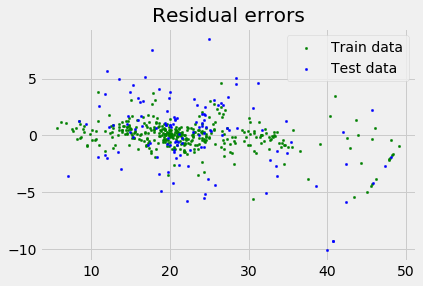

In [0]:
reg = RandomForestRegressor(n_estimators = 100, random_state = 0)
reg.fit(X_train, y_train)

y_test_predicted = reg.predict(X_test)
y_train_predicted = reg.predict(X_train) #We will need it later

y_test_predicted = y_test_predicted[:,np.newaxis]
y_train_predicted = y_train_predicted[:,np.newaxis]

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_predicted))
print('Variance score: %.2f' % r2_score(y_test, y_test_predicted))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train_predicted.shape)
print(y_test_predicted.shape)

# All of them need to be in one cell
plt.style.use('fivethirtyeight') 
plt.scatter(y_train_predicted, y_train_predicted - y_train, color = "green", s = 5, label = 'Train data')
plt.scatter(y_test_predicted, y_test_predicted - y_test, color = "blue", s = 5, label = 'Test data')
plt.legend(loc = 'upper right') 
plt.title("Residual errors")
plt.show()

Mean squared error: 21.90
Variance score: 0.78
(379, 13)
(127, 13)
(379, 1)
(127, 1)
(379, 1)
(127, 1)


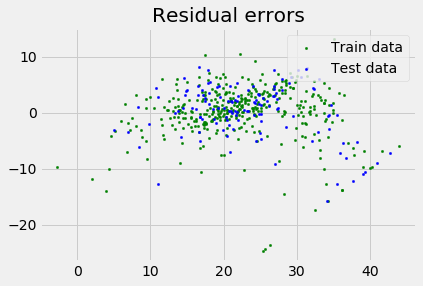

In [0]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_test_predicted = reg.predict(X_test)
y_train_predicted = reg.predict(X_train) #We will need it later

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_predicted))
print('Variance score: %.2f' % r2_score(y_test, y_test_predicted))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train_predicted.shape)
print(y_test_predicted.shape)

# All of them need to be in one cell
plt.style.use('fivethirtyeight') 
plt.scatter(y_train_predicted, y_train_predicted - y_train, color = "green", s = 5, label = 'Train data')
plt.scatter(y_test_predicted, y_test_predicted - y_test, color = "blue", s = 5, label = 'Test data')
plt.legend(loc = 'upper right') 
plt.title("Residual errors")
plt.show()

Mean squared error: 25.35
Variance score: 0.74
(379, 105)
(127, 105)
(379, 1)
(127, 1)
(379, 1)
(127, 1)


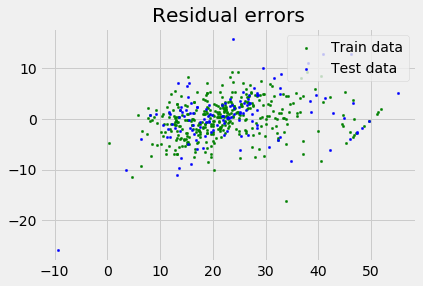

In [0]:
#POLYNOMIAL REGRESSOR
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

DEGREE_OF_POLYNOMIAL = 2
poly = PolynomialFeatures(degree = DEGREE_OF_POLYNOMIAL)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

poly.fit(X_train, y_train)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_test_predicted = reg.predict(X_test)
y_train_predicted = reg.predict(X_train) #We will need it later

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_predicted))
print('Variance score: %.2f' % r2_score(y_test, y_test_predicted))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train_predicted.shape)
print(y_test_predicted.shape)

# All of them need to be in one cell
plt.style.use('fivethirtyeight') 
plt.scatter(y_train_predicted, y_train_predicted - y_train, color = "green", s = 5, label = 'Train data')
plt.scatter(y_test_predicted, y_test_predicted - y_test, color = "blue", s = 5, label = 'Test data')
plt.legend(loc = 'upper right') 
plt.title("Residual errors")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

Mean squared error: 19.08
Variance score: 0.81
(379, 13)
(127, 13)
(379, 1)
(127, 1)
(379, 1)
(127, 1)


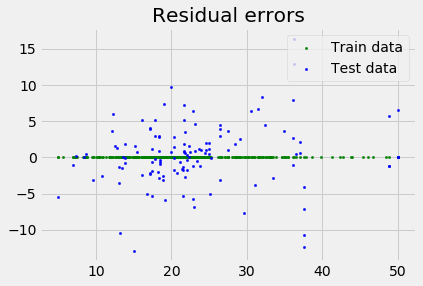

In [0]:
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train, y_train)

y_test_predicted = reg.predict(X_test)
y_train_predicted = reg.predict(X_train) #We will need it later

y_test_predicted = y_test_predicted[:,np.newaxis]
y_train_predicted = y_train_predicted[:,np.newaxis]

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_predicted))
print('Variance score: %.2f' % r2_score(y_test, y_test_predicted))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train_predicted.shape)
print(y_test_predicted.shape)

# All of them need to be in one cell
plt.style.use('fivethirtyeight') 
plt.scatter(y_train_predicted, y_train_predicted - y_train, color = "green", s = 5, label = 'Train data')
plt.scatter(y_test_predicted, y_test_predicted - y_test, color = "blue", s = 5, label = 'Test data')
plt.legend(loc = 'upper right') 
plt.title("Residual errors")
plt.show()

Mean squared error: 21.32
Variance score: 0.78
(379, 13)
(127, 13)
(379, 1)
(127, 1)
(379, 1)
(127, 1)


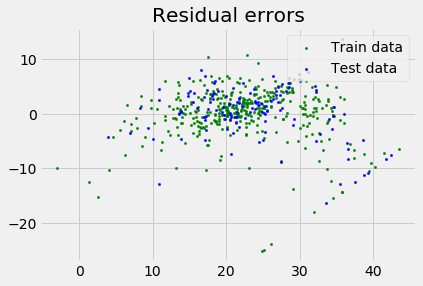

In [0]:
reg = Ridge()
reg.fit(X_train, y_train)

y_test_predicted = reg.predict(X_test)
y_train_predicted = reg.predict(X_train) #We will need it later

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_predicted))
print('Variance score: %.2f' % r2_score(y_test, y_test_predicted))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train_predicted.shape)
print(y_test_predicted.shape)

# All of them need to be in one cell
plt.style.use('fivethirtyeight') 
plt.scatter(y_train_predicted, y_train_predicted - y_train, color = "green", s = 5, label = 'Train data')
plt.scatter(y_test_predicted, y_test_predicted - y_test, color = "blue", s = 5, label = 'Test data')
plt.legend(loc = 'upper right') 
plt.title("Residual errors")
plt.show()

Mean squared error: 33.46
Variance score: 0.66
(379, 13)
(127, 13)
(379, 1)
(127, 1)
(379, 1)
(127, 1)


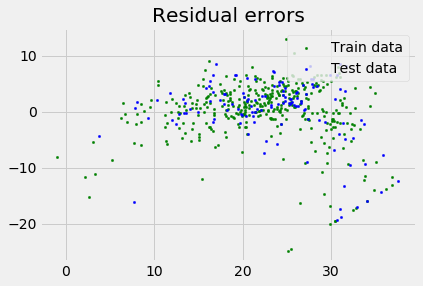

In [0]:
reg = Lasso()
reg.fit(X_train, y_train)

y_test_predicted = reg.predict(X_test)
y_train_predicted = reg.predict(X_train) #We will need it later

y_test_predicted = y_test_predicted[:,np.newaxis]
y_train_predicted = y_train_predicted[:,np.newaxis]

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_predicted))
print('Variance score: %.2f' % r2_score(y_test, y_test_predicted))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train_predicted.shape)
print(y_test_predicted.shape)

# All of them need to be in one cell
plt.style.use('fivethirtyeight') 
plt.scatter(y_train_predicted, y_train_predicted - y_train, color = "green", s = 5, label = 'Train data')
plt.scatter(y_test_predicted, y_test_predicted - y_test, color = "blue", s = 5, label = 'Test data')
plt.legend(loc = 'upper right') 
plt.title("Residual errors")
plt.show()

Mean squared error: 30.45
Variance score: 0.69
(379, 13)
(127, 13)
(379, 1)
(127, 1)
(379, 1)
(127, 1)


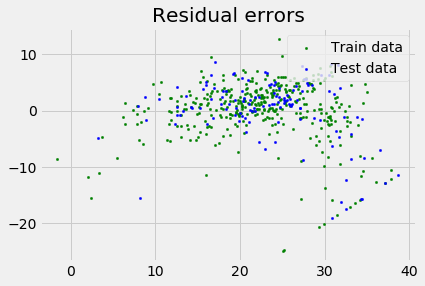

In [0]:
reg = ElasticNet()
reg.fit(X_train, y_train)

y_test_predicted = reg.predict(X_test)
y_train_predicted = reg.predict(X_train) #We will need it later

y_test_predicted = y_test_predicted[:,np.newaxis]
y_train_predicted = y_train_predicted[:,np.newaxis]

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_predicted))
print('Variance score: %.2f' % r2_score(y_test, y_test_predicted))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train_predicted.shape)
print(y_test_predicted.shape)

# All of them need to be in one cell
plt.style.use('fivethirtyeight') 
plt.scatter(y_train_predicted, y_train_predicted - y_train, color = "green", s = 5, label = 'Train data')
plt.scatter(y_test_predicted, y_test_predicted - y_test, color = "blue", s = 5, label = 'Test data')
plt.legend(loc = 'upper right') 
plt.title("Residual errors")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed whe

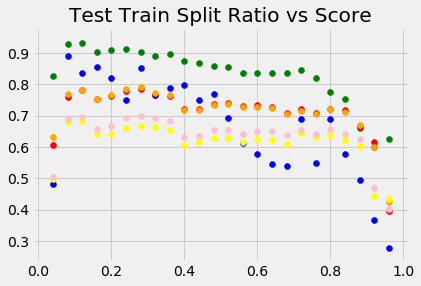

In [0]:
# Graph of Test Train Split Ratio vs Score

reg = RandomForestRegressor(n_estimators = 100, random_state = 0)
reg2 = LinearRegression()
reg3 = DecisionTreeRegressor(random_state=0)
reg4 = Ridge() # Similar to reg2
reg5 = Lasso() # Similar to reg3
reg6 = ElasticNet() # Similar to reg3

x_axis = []

y_axis = []
y_axis2 = []
y_axis3 = []
y_axis4 = []
y_axis5 = []
y_axis6 = []

for counter in range(1,25,1):

  i = counter/25
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=1)

  x_axis.append(i)

  reg.fit(X_train, y_train)
  y_axis.append(reg.score(X_test, y_test))
  
  reg2.fit(X_train, y_train)
  y_axis2.append(reg2.score(X_test, y_test))

  reg3.fit(X_train, y_train)
  y_axis3.append(reg3.score(X_test, y_test))
  
  reg4.fit(X_train, y_train)
  y_axis4.append(reg4.score(X_test, y_test))

  reg5.fit(X_train, y_train)
  y_axis5.append(reg5.score(X_test, y_test))

  reg6.fit(X_train, y_train)
  y_axis6.append(reg6.score(X_test, y_test))

plt.scatter( x_axis , y_axis , color = "green")
plt.scatter( x_axis , y_axis2 , color = "red")
plt.scatter( x_axis , y_axis3 , color = "blue")
plt.scatter( x_axis , y_axis4 , color = "orange")
plt.scatter( x_axis , y_axis5 , color = "yellow")
plt.scatter( x_axis , y_axis6 , color = "pink")

plt.title("Test Train Split Ratio vs Score") 
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed whe

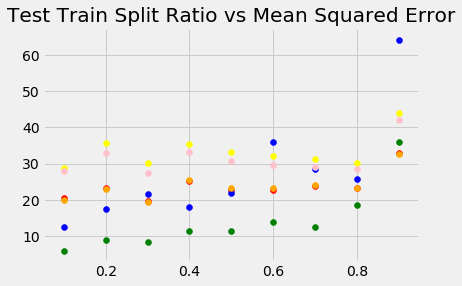

In [0]:
# Graph of Test Train Split Ratio vs Mean Squared Error

reg = RandomForestRegressor(n_estimators = 100, random_state = 0)
reg2 = LinearRegression()
reg3 = DecisionTreeRegressor(random_state=0)
reg4 = Ridge() # Similar to reg2
reg5 = Lasso() # Similar to reg3
reg6 = ElasticNet() # Similar to reg3

x_axis = []

y_axis = []
y_axis2 = []
y_axis3 = []
y_axis4 = []
y_axis5 = []
y_axis6 = []

for counter in range(1,10,1):
  i = counter/10
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=1)

  x_axis.append(i)

  reg.fit(X_train, y_train)
  y_test_predicted = reg.predict(X_test)
  y_test_predicted = y_test_predicted[:,np.newaxis]
  y_axis.append(mean_squared_error(y_test, y_test_predicted))
  
  reg2.fit(X_train, y_train)
  y_test_predicted2 = reg2.predict(X_test)
  y_axis2.append(mean_squared_error(y_test, y_test_predicted2))

  reg3.fit(X_train, y_train)
  y_test_predicted3 = reg3.predict(X_test)
  y_test_predicted3 = y_test_predicted3[:,np.newaxis]
  y_axis3.append(mean_squared_error(y_test, y_test_predicted3))
  
  reg4.fit(X_train, y_train)
  y_test_predicted4 = reg4.predict(X_test)
  y_axis4.append(mean_squared_error(y_test, y_test_predicted4))

  reg5.fit(X_train, y_train)
  y_test_predicted5 = reg5.predict(X_test)
  y_test_predicted5 = y_test_predicted5[:,np.newaxis]
  y_axis5.append(mean_squared_error(y_test, y_test_predicted5))

  reg6.fit(X_train, y_train)
  y_test_predicted6 = reg6.predict(X_test)
  y_test_predicted6 = y_test_predicted6[:,np.newaxis]
  y_axis6.append(mean_squared_error(y_test, y_test_predicted6))

plt.scatter( x_axis , y_axis , color = "green")
plt.scatter( x_axis , y_axis2 , color = "red")
plt.scatter( x_axis , y_axis3 , color = "blue")
plt.scatter( x_axis , y_axis4 , color = "orange")
plt.scatter( x_axis , y_axis5 , color = "yellow")
plt.scatter( x_axis , y_axis6 , color = "pink")

plt.title("Test Train Split Ratio vs Mean Squared Error") 
plt.show()

In [0]:
# Graph of Random State vs Score
# Way too random

x_axis = []

y_axis = []
y_axis2 = []
y_axis3 = []
y_axis4 = []
y_axis5 = []
y_axis6 = []

for counter in range(20):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=counter)

  x_axis.append(counter)

  reg = RandomForestRegressor(n_estimators = 100, random_state = counter)
  reg.fit(X_train, y_train)
  y_axis.append(reg.score(X_test, y_test))
  
  reg2 = LinearRegression()
  reg2.fit(X_train, y_train)
  y_axis2.append(reg2.score(X_test, y_test))

  reg3 = DecisionTreeRegressor(random_state=counter)
  reg3.fit(X_train, y_train)
  y_axis3.append(reg3.score(X_test, y_test))
  
  reg4 = Ridge()
  reg4.fit(X_train, y_train)
  y_axis4.append(reg4.score(X_test, y_test))
  
  reg5 = Lasso()
  reg5.fit(X_train, y_train)
  y_axis5.append(reg5.score(X_test, y_test))
  
  reg6 = ElasticNet()
  reg6.fit(X_train, y_train)
  y_axis6.append(reg6.score(X_test, y_test))

plt.scatter( x_axis , y_axis , color = "green")
plt.scatter( x_axis , y_axis2 , color = "red")
plt.scatter( x_axis , y_axis3 , color = "blue")
plt.scatter( x_axis , y_axis4 , color = "orange")
plt.scatter( x_axis , y_axis5 , color = "yellow")
plt.scatter( x_axis , y_axis6 , color = "pink")

plt.title("Random State vs Score") 
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed whe